<a href="https://colab.research.google.com/github/mrpintime/Epileptic-Seizure-Recognition/blob/main/Epileptic_Seizure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EEG-Based Seizure Detection and Analysis
Created by Moein aka Mrpintime



---



---



# Dataset Description
The original dataset from the reference consists of 5 different folders, each with 100 files, with each file representing a single subject/person. Each file is a recording of brain activity for 23.6 seconds. The corresponding time-series is sampled into 4097 data points. Each data point is the value of the EEG recording at a different point in time. So we have total 500 individuals with each has 4097 data points for 23.5 seconds.

We divided and shuffled every 4097 data points into 23 chunks, each chunk contains 178 data points for 1 second, and each data point is the value of the EEG recording at a different point in time. So now we have 23 x 500 = 11500 pieces of information(row), each information contains 178 data points for 1 second(column), the last column represents the label y {1,2,3,4,5}.

The response variable is y in column 179, the Explanatory variables X1, X2, …, X178

y contains the category of the 178-dimensional input vector. Specifically y in {1, 2, 3, 4, 5}:

5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

This Dataset collect from UCI Machine Learning Repository

# Our Objects of Analysis  
We try to analysis this dataset with machine learning and datascience methodology to find out that are we can classified and detect people with `seizure` with high quality to predict the attack and help patient before that.

# Import Dataset

In [93]:
# this cell is for install cuML on Colab
# !git clone https://github.com/rapidsai/rapidsai-csp-utils.git
# !python rapidsai-csp-utils/colab/pip-install.py

In [2]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Epileptic Seizure Recognition/Epileptic Seizure Recognition.csv")

# Pre-Processing (Cleansing)

In [ ]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


**We check our dataset for missing value**  
there are no missing values fortunately

In [ ]:
df.isnull().sum().sum()

0

**Check shape of the dataset and keep important columns**  
As we can see we have `11500 instances` and `178 features` as data point that `ECG waves` collected, so lets check this is true or not based on dataset description.  

First: We have `5` group of patients, each group with `100` patients so we have `500` patients in total.

Second: ECG Device monitor each paitent in `23.6` seconds and collect `4097` signals or data point from head.

Third: So on the other hand if we consider total time to be `23` seconds instead of `23.6` seconds then ECG Device have collected `(4097/23 = 178`) signals per second. 

So we have `178` features and `(50*100*23 = 11500)` rows that satisfied our dataset shape.  

---
So we can remove `Unnamed` columns for now.

In [ ]:
df.shape

(11500, 180)

In [ ]:
df.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


**Note:** Always look at you memory when you want to work with big dataset  such as right now i define new dataset without removing the previous one cause i have enough memory but if you do not have you can use another approach. 

In [ ]:
df_new = df.drop(columns=['Unnamed'], axis=1)

Now our dataset is clean  

---

Let's do some Exploratory Data Analysis 

# Exploratory Data Analysis

**We analyse descriptive statistic.**  
As we can see if we want to use some models that are sensitive to `outliers` or to `unscaled` features we have to scaled them, cause we see features are in different scales.  

So Let's ignore it for now.

In [ ]:
df_new.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


**Let's Check Pearson Correlation of features with Target Variable (y)**  
We can see `strong positive correlation` is `0.02` for `X173` and `strong negative correlation` is `-0.04` that is for `X44`.


---
So it is a disappointing moment but we continue :) 

In [ ]:
df_new.corrwith(df_new['y']).sort_values(ascending=False)

y       1.000000
X173    0.029172
X174    0.028563
X175    0.028425
X176    0.027259
          ...   
X158   -0.034805
X12    -0.035379
X11    -0.038056
X43    -0.038320
X44    -0.040499
Length: 179, dtype: float64

**Let's Check `Pearson Correlation` between features**  


---

As we see at least there is one strong positive corelation between two features, so there is `collinearity` in our dataset

In [ ]:
corr_df = df_new.corr().iloc[:, :-1]
clms = corr_df.columns

features_corr = dict()
for i in clms:
  features_corr[i] = [corr_df[i].min(), corr_df[i].drop(index=i).max()]

pd.DataFrame(features_corr, index=['Min', 'Max']).T.describe()

,Min,Max
count,178.000000,178.000000
mean,-0.167021,0.938762
std,0.020967,0.004814
min,-0.210484,0.927786
25%,-0.180407,0.935253
50%,-0.167769,0.938911
75%,-0.154323,0.942014
max,-0.085816,0.950880


**Note:** We can not check correlation with `F-Statstic` and `P-Value`  in `Analysis of Variance` approach because we did not meet the assumption of ANOVA.


---

The ANOVA test has important assumptions that must be satisfied in order
for the associated p-value to be valid.

*  The samples are independent.


*    Each sample is from a normally distributed population.

*   The population standard deviations of the groups are all equal.  This property is known as homoscedasticity.

**But we can use other metrics in ANOVA with less power** but for now let me ignore those.


**Lets Check pairwise plot for some features**  

We can see there is `Collinearity` between features with a pattern, each feature has `strong positive correlation` with `previous feature` and `next feature` but you know why do we have this pattern? :).   

Now we prove our assumption as Collinearity.  
as we can see they have simmilar distribution

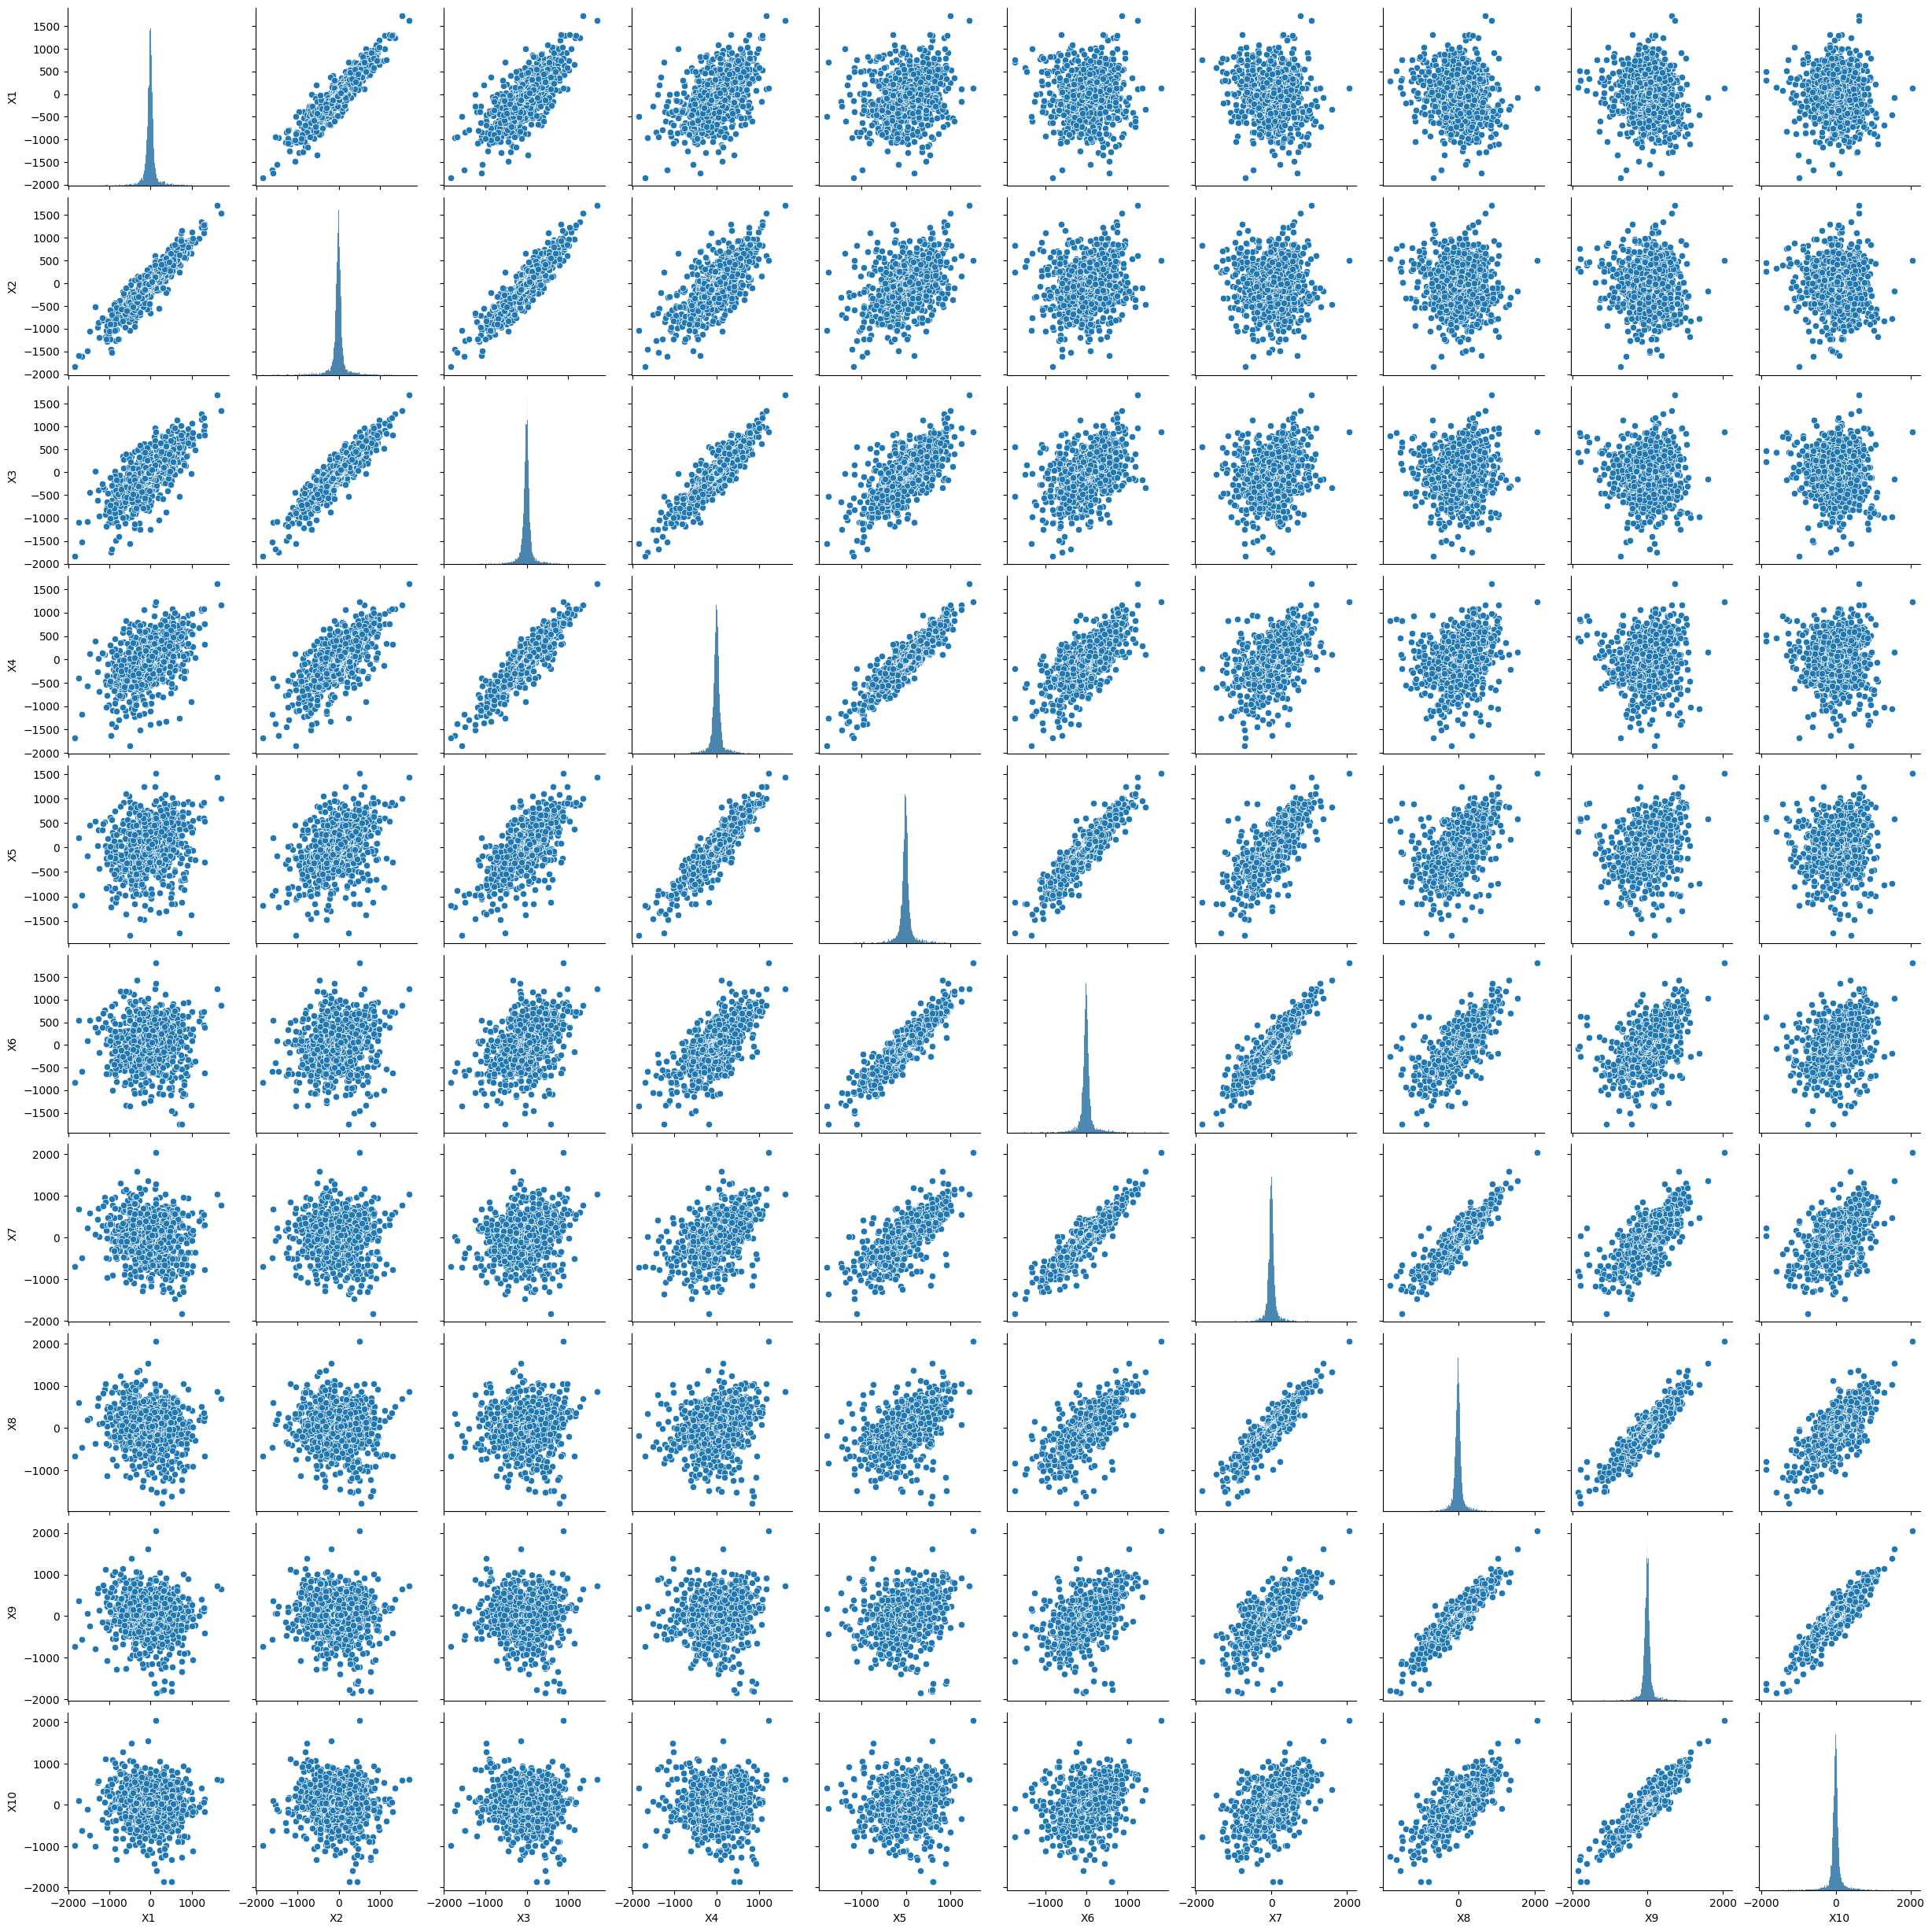

In [ ]:
sns.pairplot(df_new.iloc[:,[0,1,2,3,4,5,6,7,8,9]])

Lets Check distribution of  `STD` and `Mean` of our features

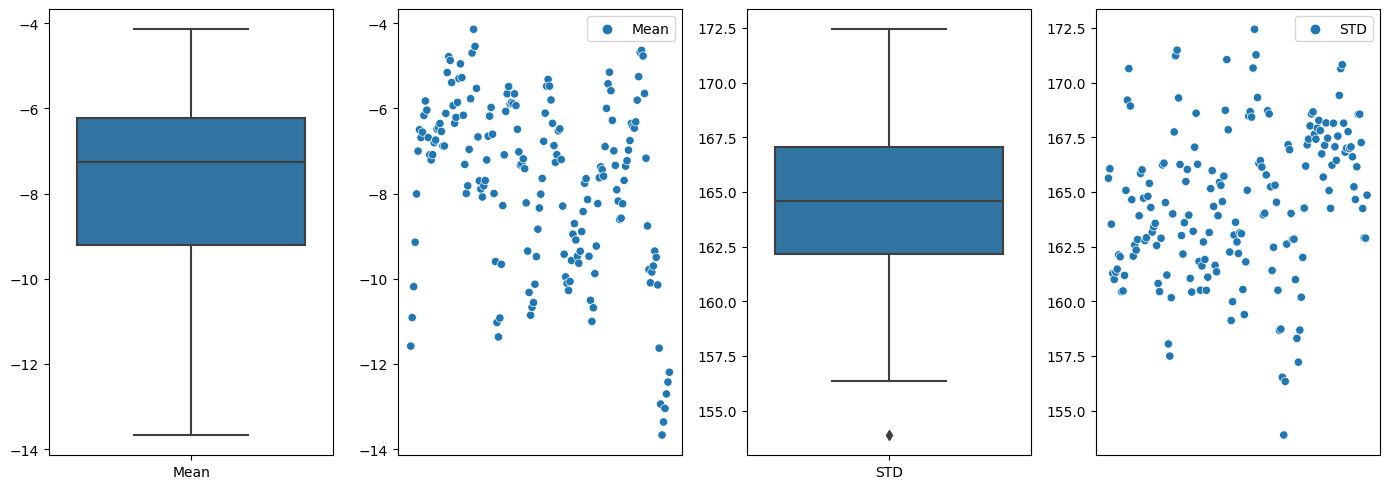

In [ ]:
mean_dist = df_new.iloc[ : , :-1].describe().loc['mean',:] 
std_dist = df_new.iloc[ : , :-1].describe().loc['std',:]


plt.figure(figsize=(14,5))
ax_1 = plt.subplot(1,4,1)
sns.boxplot(pd.DataFrame({'Mean':mean_dist}), ax=ax_1)

ax_2 = plt.subplot(1,4,2)
ax2 = sns.scatterplot(pd.DataFrame({'Mean':mean_dist}), ax=ax_2)

ax2.tick_params(bottom=False, labelbottom=False)


ax_3 = plt.subplot(1,4,3)
sns.boxplot(pd.DataFrame({'STD':std_dist}), ax=ax_3)


ax_4 = plt.subplot(1,4,4)
ax4 = sns.scatterplot(pd.DataFrame({'STD':std_dist}), ax=ax_4)

ax4.tick_params( bottom=False, labelbottom=False)


plt.tight_layout()

As we can see `MEAN` and `STD` parameters of features are well distributed but we can see two thing :
1. `Mean` is skewed.
2. There is Outlier in `STD` graph based on boxplot.

In [ ]:
# # Save the preprocessed dataset
# df_new.to_csv('/content/drive/MyDrive/Epileptic Seizure Recognition/semi-preprocessed.csv', index=False)

In [3]:
# read dataset

# df_new = pd.read_csv("/content/drive/MyDrive/Epileptic Seizure Recognition/semi-preprocessed.csv")

In [ ]:
df_new.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


# Predictive Analysis
**Now we want to go to predictive analysis but if we need some features engineering we will do that in appropriate way**

---


### Preprocessing (Preparing Features to implementing Models)

**Lets check the distribution of target variable**

As we can see we have `uniform distribution` it is mean that we have equal numbers of each kind of value in target variable distribution.

In [ ]:
df_new.y.value_counts()

4    2300
1    2300
5    2300
2    2300
3    2300
Name: y, dtype: int64

Another thing that we know from dataset description is that just one value indicate Seizure happened.  **Look at the following Description**:  
> 5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

> 4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

> 3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

> 2 - They recorder the EEG from the area where the tumor was located

> 1 - Recording of seizure activity 

---
---

One Approach is that we change it to binary classification (`Seizure` or `not Seizure`) based on that we just want to predict Seizure in patients.

Lets Implement it

First change other categories to `0`

In [4]:
def f(x):
  if x in [2,3,4,5]:
    return 0
  else:
    return 1

df_new['y'] = df_new.y.apply(f)

In [5]:
np.unique(df_new.y)

array([0, 1])

Second by looking at new distribution we see that we have `imbalance` dataset. 

<Axes: >

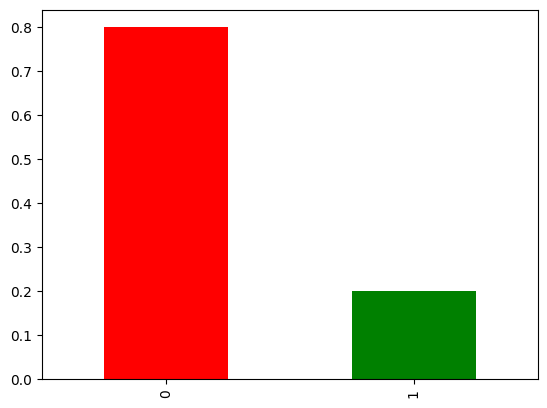

In [ ]:
df_new['y'].value_counts(normalize=True).plot.bar(color=['red', 'green'])

We have some approachs in this position:


1.   Create our models with this `imbalance` dataset and see how they work
2.   Useing `Upsampling` method to create `balance` dataset and then create our models
3.     Using `Downsampling` method to create `balance` dataset and then create our models
4.     Using `Resampling` method to create `balance` dataset and then create our models
5.     Using `Class Weghting` method to make balance importance of each kind of Target values for models 



Let's import libraries for creating classification models

In [6]:
#models
import cuml # using cuML lib because of GPU computating, it has simmilar syntax to sklearn
from sklearn.svm import SVC, LinearSVC
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, PrecisionRecallDisplay, accuracy_score, recall_score, precision_recall_fscore_support

#hyperparameters tuning
from sklearn.model_selection import GridSearchCV

#Others 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import StandardScaler
from sklearn.pipeline import Pipeline

#sampling
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.over_sampling import SMOTE, RandomOverSampler, KMeansSMOTE


### Create our models with this imbalance dataset

### Logistic Regression

Split the Dataset and creat `X` and `y` dataset

In [7]:
X = df_new.iloc[:, : -1]
y = df_new.iloc[:, -1: ]

We use stratify parameter to save relative ferquency in `y_train` and `y_test` dataset 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=12)

In [9]:
y_test.value_counts(normalize=True)

y
0    0.8
1    0.2
dtype: float64

In [10]:
y_train.value_counts(normalize=True)

y
0    0.8
1    0.2
dtype: float64

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8050, 178), (3450, 178), (8050, 1), (3450, 1))

Scaled the Features  
**Note**: We `have not` to use fit method for `X_test` dataset because of `data leakage`  

In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Implement The Model

As we see our model has bad recall on predicting `Seizure (class 1)`.  

**Note**: In project like this that if we can not predict minor class correctly we take a high risks that threat patients life.  

In the dataset like this we should have evaluate model with metrics like `recall, f1score, roc_auc score` 

Create a function to get recall score for train and test set

In [13]:
def recall_sc(x_train, x_test, y_train, y_test, model):
  return {'recall_trainSet': recall_score(y_train, model.predict(x_train), pos_label=1), 'recall_testSet': recall_score(y_test, model.predict(x_test), pos_label=1)}

In [14]:
logis = LogisticRegression(max_iter=1000)
logis.fit(X_train, y_train.values.ravel())

pred = logis.predict(X_test)

print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2760
           1       1.00      0.11      0.19       690

    accuracy                           0.82      3450
   macro avg       0.91      0.55      0.55      3450
weighted avg       0.85      0.82      0.76      3450



**Hyperparameters Tuning**

We use cuML because of fast computing

In [15]:
logis = cuml.LogisticRegression()
params = {'C':[0.3*n for n in range(1,10)], 'penalty':['l1', 'l2']}

gr_logis = GridSearchCV(estimator=logis, param_grid=params, n_jobs=-1, cv=3, scoring='recall')
gr_logis.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.3, 0.6, 0.8999999999999999, 1.2, 1.5,
                               1.7999999999999998, 2.1, 2.4,
                               2.6999999999999997],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [16]:
gr_logis.best_params_

{'C': 2.6999999999999997, 'penalty': 'l2'}

In [17]:
pred = gr_logis.predict(X_test)

print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90      2760
           1       1.00      0.11      0.20       690

    accuracy                           0.82      3450
   macro avg       0.91      0.56      0.55      3450
weighted avg       0.85      0.82      0.76      3450



In [18]:
recall_sc(X_train, X_test, y_train, y_test, gr_logis.best_estimator_)

{'recall_trainSet': 0.15838509316770186, 'recall_testSet': 0.11159420289855072}

In [19]:
roc_auc_score(y_true=y_test, y_score=pred)

0.5557971014492754

**As we saw `Logistic regression` can not perform so well in this data set** 

### KNN Algorithm


Ignore warnings during training

In [20]:
knn = cuml.neighbors.KNeighborsClassifier()
params = {'n_neighbors':[2*n for n in range(1,50)]}

gr_knn = GridSearchCV(estimator=knn, param_grid=params, cv=3, scoring='recall')
gr_knn.fit(X_train, y_train.values.ravel())

[I] [19:24:22.421875] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [19:24:22.424886] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [19:24:24.053138] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [19:24:24.082782] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [19:24:24.114894] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [19:24:24.143513] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [19:24:24.170208] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [19:24:24.197155] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [19:24:24.226760] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [19:24:24.253543] Unused keyword parameter: n_jobs during cuML estimator initialization
[I] [19:24:24.284917] Unused keyword parameter: n_jobs during cuML estimator ini

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22,
                                         24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
                                         44, 46, 48, 50, 52, 54, 56, 58, 60, ...]},
             scoring='recall')

In [21]:
gr_knn.best_params_

{'n_neighbors': 2}

In [22]:
pred = gr_knn.predict(X_test)

print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2760
           1       1.00      0.63      0.77       690

    accuracy                           0.93      3450
   macro avg       0.96      0.82      0.86      3450
weighted avg       0.93      0.93      0.92      3450



In [23]:
recall_sc(X_train, X_test, y_train, y_test, gr_knn.best_estimator_)

{'recall_trainSet': 0.7329192546583851, 'recall_testSet': 0.6304347826086957}

In [24]:
roc_auc_score(y_true=y_test, y_score=pred)

0.8152173913043479

**As we saw `KNearest Neighbor` perform better than `Logistic regression` but it is not enough**.

### Support Vector Machine

**Note**: we have many features (178) so probably we do not need to use kernel transformation and we can get good recall with `LinearSVC`.

In [36]:
svc_ml = cuml.svm.LinearSVC()
# svc_ml = LinearSVC()
params = {'C':[0.2*n for n in range(1,20)], 'penalty':['l1','l2']}

gr_svc_linear = GridSearchCV(estimator=svc_ml, param_grid=params, n_jobs=-1, cv=3, scoring='recall')
gr_svc_linear.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.2, 0.4, 0.6000000000000001, 0.8, 1.0,
                               1.2000000000000002, 1.4000000000000001, 1.6, 1.8,
                               2.0, 2.2, 2.4000000000000004, 2.6,
                               2.8000000000000003, 3.0, 3.2, 3.4000000000000004,
                               3.6, 3.8000000000000003],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [37]:
gr_svc_linear.best_params_

{'C': 3.4000000000000004, 'penalty': 'l2'}

In [38]:
pred = gr_svc_linear.predict(X_test)

print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      2760
           1       1.00      0.09      0.16       690

    accuracy                           0.82      3450
   macro avg       0.91      0.54      0.53      3450
weighted avg       0.85      0.82      0.75      3450



In [39]:
recall_sc(X_train, X_test, y_train, y_test, gr_svc_linear.best_estimator_)

{'recall_trainSet': 0.12795031055900621, 'recall_testSet': 0.08695652173913043}

In [40]:
roc_auc_score(y_true=y_test, y_score=pred)

0.5434782608695652


We saw LinearSVC could not perform so well on our data.

---

**Now let's  use kernel transformation**

In [41]:
svc_ml = cuml.svm.SVC()
# svc_ml = LinearSVC()
params = {'C':[0.2*n for n in range(1,20)], 'kernel':['rbf', 'poly', 'sigmoid'], 
          'degree':[2,3,4]}

gr_svc = GridSearchCV(estimator=svc_ml, param_grid=params, n_jobs=-1, cv=3, scoring='recall')
gr_svc.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.2, 0.4, 0.6000000000000001, 0.8, 1.0,
                               1.2000000000000002, 1.4000000000000001, 1.6, 1.8,
                               2.0, 2.2, 2.4000000000000004, 2.6,
                               2.8000000000000003, 3.0, 3.2, 3.4000000000000004,
                               3.6, 3.8000000000000003],
                         'degree': [2, 3, 4],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='recall')

In [42]:
gr_svc.best_params_

{'C': 3.8000000000000003, 'degree': 2, 'kernel': 'rbf'}

In [44]:
pred = gr_svc.predict(X_test)

print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2760
           1       0.96      0.94      0.95       690

    accuracy                           0.98      3450
   macro avg       0.97      0.96      0.97      3450
weighted avg       0.98      0.98      0.98      3450



In [45]:
recall_sc(X_train, X_test, y_train, y_test, gr_svc.best_estimator_)

{'recall_trainSet': 0.9714285714285714, 'recall_testSet': 0.936231884057971}

In [46]:
roc_auc_score(y_true=y_test, y_score=pred)

0.9630434782608696

**Fantastico!! we achieved much `higher recall score` with `kernel transformation` rather than `Linear` kernel**

In confusion matrix we can see we have `44 False Negative` we have to try to decrease this number, because if we have a wrong prediction for who has seizure it may has cost of his/her life.

Text(0.5, 23.52222222222222, 'Prediction')

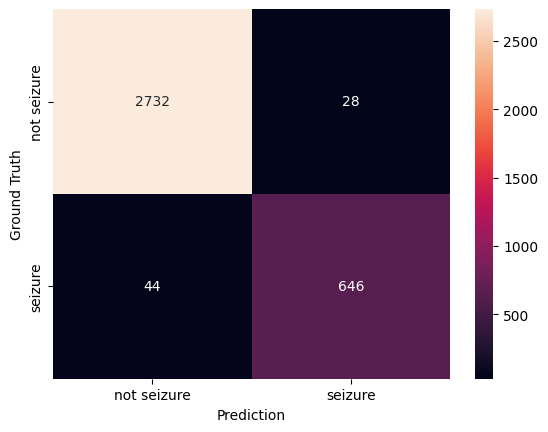

In [47]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['not seizure', 'seizure'], yticklabels=['not seizure', 'seizure'])
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')

### RandomForestClassifier

**By default we use Hyperparameters tuning**  
**Note**: Random Forest is highly motivate to overfit and be complex.  
**Note**: we can use `warm_start` parameter to build estimators faster in scikit-learn.

In [ ]:
rf_tree = cuml.ensemble.RandomForestClassifier(bootstrap=True) # do not support warm_start
# rf_tree = RandomForestClassifier(bootstrap=True, warm_start=True)

# 0 = 'gini', 1 = 'entropy'
params = {'split_criterion':[0, 1], 'max_depth':[2,4,6,8], 
          'n_estimators':[50,100,200,300,400], 'min_samples_leaf':[1,2,3,4]}

gr_rf = GridSearchCV(estimator=rf_tree, param_grid=params, n_jobs=-1, cv=3, scoring='recall')
gr_rf.fit(X_train, y_train.values.ravel())

In [49]:
gr_rf.best_params_

{'max_depth': 8,
 'min_samples_leaf': 4,
 'n_estimators': 400,
 'split_criterion': 0}

In [50]:
pred = gr_rf.predict(X_test)

print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2760
           1       0.96      0.83      0.89       690

    accuracy                           0.96      3450
   macro avg       0.96      0.91      0.93      3450
weighted avg       0.96      0.96      0.96      3450



In [51]:
recall_sc(X_train, X_test, y_train, y_test, gr_rf.best_estimator_)

{'recall_trainSet': 0.8596273291925466, 'recall_testSet': 0.8304347826086956}

In [52]:
roc_auc_score(y_true=y_test, y_score=pred)

0.9110507246376811

In confusion matrix we can see we have `117 False Negative`.

Text(0.5, 23.52222222222222, 'Prediction')

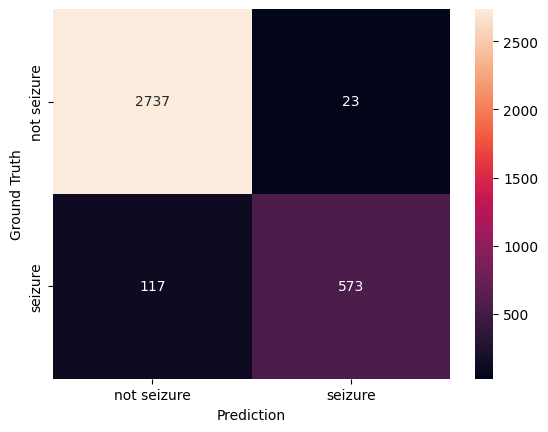

In [53]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['not seizure', 'seizure'], yticklabels=['not seizure', 'seizure'])
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')

as we can see it is still better that `Logistic Regression` and `KNN` and `Linear SCV`.  
But we have lower score rather than `SVC with rbf kernel` and also we need more time and resources to train model.  
Here our best parameters were include `400 estimators`, also with 400 or above estimators we need `more resources` and `time` to train that is not cost efficient.

### Gradient Boosting  
**Note**: Right now we can not use cuML library to implement this model with advantages of GPU, so There is two option to do it faster than normal: 

1.   Libs that support GPU: `xgboost`, `LightGBM` or `Catboost` 
2.   Not GPU usage: `HistGradientBoostingClassifier` from `sklearn`


---
We ignore this by now and go to next model that is `Stacking` and `Voting`.


### Voting&Stacking  
***We have a few trained model and now we want to combine them.***

#### Voting

In [54]:
clf1 = RandomForestClassifier(max_depth=8, min_samples_leaf=4,
                                              n_estimators=400,criterion='gini')

clf2 = SVC(C=3.8, kernel= 'rbf')

vti = VotingClassifier(estimators=[('RF_T', clf1), ('SVC_K', clf2)])

vti.fit(X_train, y_train.values.ravel())

VotingClassifier(estimators=[('RF_T',
                              RandomForestClassifier(max_depth=8,
                                                     min_samples_leaf=4,
                                                     n_estimators=400)),
                             ('SVC_K', SVC(C=3.8))])

In [55]:
pred = vti.predict(X_test)

print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2760
           1       0.97      0.83      0.90       690

    accuracy                           0.96      3450
   macro avg       0.96      0.91      0.94      3450
weighted avg       0.96      0.96      0.96      3450



In [56]:
recall_sc(X_train, X_test, y_train, y_test, vti)

{'recall_trainSet': 0.8627329192546583, 'recall_testSet': 0.8318840579710145}

In [57]:
roc_auc_score(y_true=y_test, y_score=pred)

0.9126811594202899

In confusion matrix we can see we have `116 False Negative`.

Text(0.5, 23.52222222222222, 'Prediction')

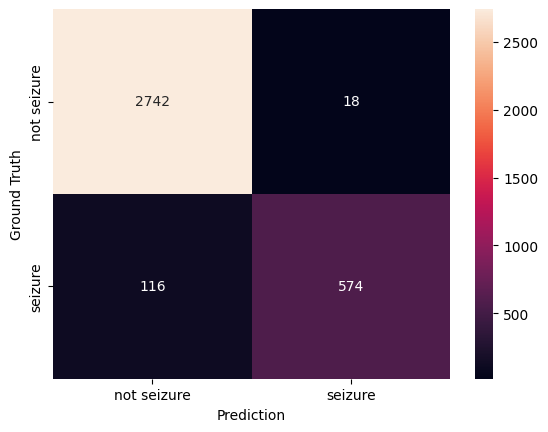

In [58]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['not seizure', 'seizure'], yticklabels=['not seizure', 'seizure'])
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')

#### Stacking


In [59]:
clf1 = RandomForestClassifier(max_depth=8, min_samples_leaf=4,
                                              n_estimators=400,criterion='gini')
clf2 = SVC(C=3.8, kernel= 'rbf')

stk = StackingClassifier(estimators=[('RF_T', clf1), ('SVC_K', clf2)])

stk.fit(X_train, y_train.values.ravel())

StackingClassifier(estimators=[('RF_T',
                                RandomForestClassifier(max_depth=8,
                                                       min_samples_leaf=4,
                                                       n_estimators=400)),
                               ('SVC_K', SVC(C=3.8))])

In [ ]:
pred = stk.predict(X_test)

print(classification_report(y_true=y_test, y_pred=pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2760
           1       0.96      0.94      0.95       690

    accuracy                           0.98      3450
   macro avg       0.97      0.97      0.97      3450
weighted avg       0.98      0.98      0.98      3450



In [ ]:
recall_sc(X_train, X_test, y_train, y_test, stk)

{'recall_trainSet': 0.9739130434782609, 'recall_testSet': 0.9420289855072463}

In [ ]:
roc_auc_score(y_true=y_test, y_score=pred)

0.9659420289855072

In confusion matrix we can see we have `40 False Negative`.

Text(0.5, 23.52222222222222, 'Prediction')

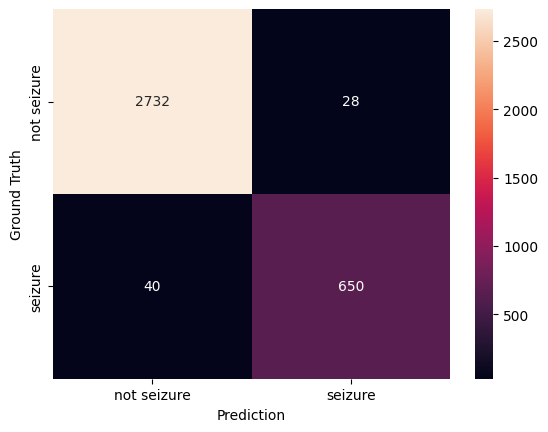

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=pred)

sns.heatmap(cm, annot=True, fmt='d', xticklabels=['not seizure', 'seizure'], yticklabels=['not seizure', 'seizure'])
plt.ylabel('Ground Truth')
plt.xlabel('Prediction')

# In conclusion  
we saw that machine learning models can perform well on imbalance dataset if you do not try to balance it.  
  

---

So at the end of this Approach (Create model with Imbalance Dataset) we could achived `96.5` `roc_auc` score for our `Stacking` model with `Logistic regression` for final estimator.  

---


**Order of the models based on `recall` and `roc_auc` score is ⛓**  
$ Stacking > SVC(kernel=rbf) > Voting
\approx RandomForest > KNN > LinearSVC \approx Logistic Regression$ 

Above results show us this rules that we do not necessarily need a complex model for complex dataset.

## Visulization

In [60]:
results = []
label = ['Stacking', 'SVC', 'Voting', 'RandomForest', 'KNN', 'Logistic Regression']
model = [stk, gr_svc, vti, gr_rf, gr_knn, gr_logis]
for m,l in zip(model, label):
  # prediction
  pred_t = m.predict(X_test)
  # precision, recall, f1score
  precision, recall, f_beta, _ = precision_recall_fscore_support(y_test, pred_t, 
                                                                   beta=5, pos_label=1, 
                                                                   average='binary')
  # AUC, Accuracy
  auc = roc_auc_score(y_true=y_test, y_score=pred_t)
  acc = accuracy_score(y_true=y_test, y_pred=pred_t)

  result = {'model': l, 'accuracy': acc, 'recall': recall
            , 'auc': auc, 'precision': precision,
            'fscore': f_beta }
  results.append(result)

In [90]:
df = pd.DataFrame(data=results)
df

,model,accuracy,recall,auc,precision,fscore
0,Stacking,0.980290,0.943478,0.966486,0.957353,0.944004
1,SVC,0.979130,0.936232,0.963043,0.958457,0.937068
2,Voting,0.961159,0.831884,0.912681,0.969595,0.836453
3,RandomForest,0.959420,0.830435,0.911051,0.961409,0.834809
4,KNN,0.926087,0.630435,0.815217,1.000000,0.639525
5,Logistic Regression,0.822319,0.111594,0.555797,1.000000,0.115542


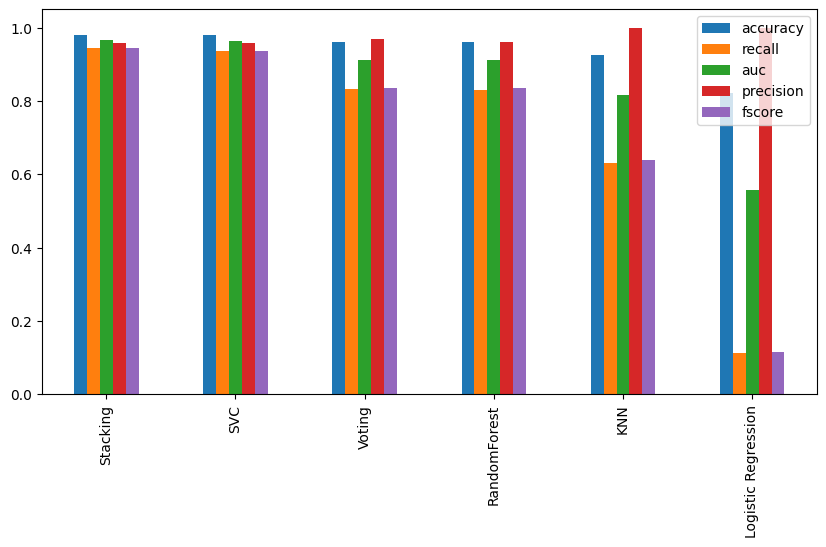

In [92]:
df.plot(kind='bar', figsize=(10,5))
plt.xticks([0,1,2,3,4,5], ['Stacking', 'SVC', 'Voting', 'RandomForest', 'KNN', 'Logistic Regression'])

plt.legend(loc='best')
plt.show()